In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/House_Rent_Dataset (2).csv')

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
#checking to see the details,size and dataset type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
#checking for missing values
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
#checing for duplicates
df.duplicated().sum()

0

In [ ]:
#Exploratory Data Analysis

<ipython-input-12-2fe295bae1bd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x=df['City'],y=df['Rent'], hue=df['BHK'],ci=None)


Text(0.5, 1.0, 'Rent in Different Cities According to BHK')

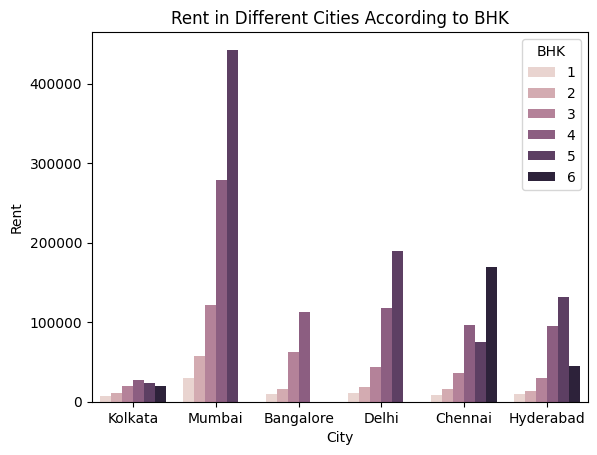

In [ ]:
#Rent in Different Cities according to BHK

sns.barplot(data=df,x=df['City'],y=df['Rent'], hue=df['BHK'],ci=None)
plt.xlabel('City')
plt.ylabel('Rent')
plt.title('Rent in Different Cities According to BHK')

<ipython-input-13-4fa2c898748f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x=df['City'],y=df['Rent'], hue=df['Area Type'], ci=None)


Text(0.5, 1.0, 'Rent in Different Cities According to Area Type')

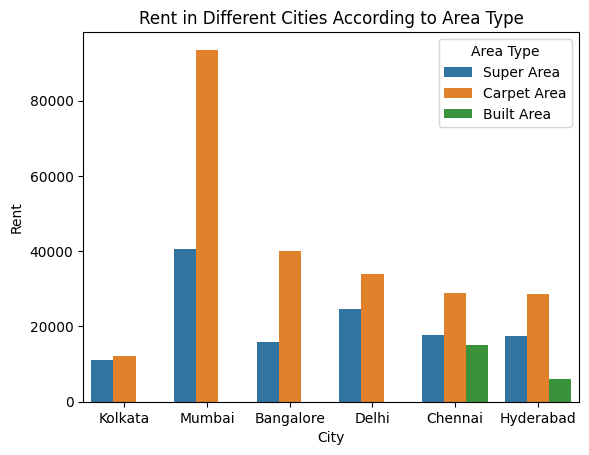

In [ ]:
#Rent in Different Cities according to Area Type
sns.barplot(data=df,x=df['City'],y=df['Rent'], hue=df['Area Type'], ci=None)
plt.xlabel('City')
plt.ylabel('Rent')
plt.title('Rent in Different Cities According to Area Type')

<ipython-input-14-8bbc644a2905>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =df,x='City', y='Rent', hue ='Furnishing Status', ci=None)


<Axes: xlabel='City', ylabel='Rent'>

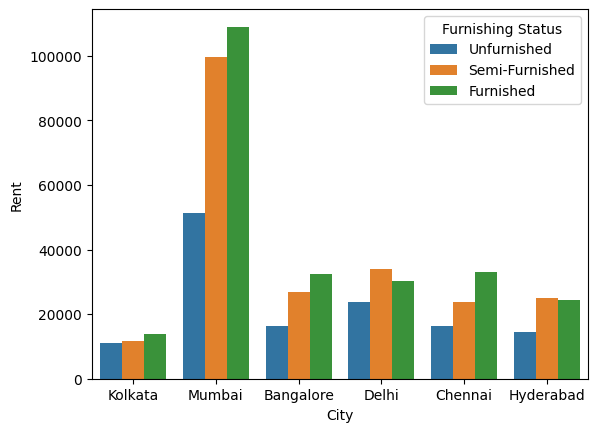

In [ ]:
#Rent in Different Cities According Furnishing status

sns.barplot(data =df,x='City', y='Rent', hue ='Furnishing Status', ci=None)

In [ ]:
#Number of Houses available for rent in each city

cities = df["City"].value_counts()
label = cities.index
counts = cities.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Number of Houses Available for Rent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
#Number of Houses available for rent based on the type of preferred tenant

tenant = df['Tenant Preferred'].value_counts()
label = tenant.index
counts = tenant.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Houses Available Based on Prefereance of Tenant')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

# House Rent Prediction Model

In [ ]:
df["Area Type"] = df["Area Type"].map({"Super Area": 1,
                                           "Carpet Area": 2,
                                           "Built Area": 3})
df["City"] = df["City"].map({"Mumbai": 4000, "Chennai": 6000,
                                 "Bangalore": 5600, "Hyderabad": 5000,
                                 "Delhi": 1100, "Kolkata": 7000})
df["Furnishing Status"] = df["Furnishing Status"].map({"Unfurnished": 0,
                                                           "Semi-Furnished": 1,
                                                           "Furnished": 2})
df["Tenant Preferred"] = df["Tenant Preferred"].map({"Bachelors/Family": 2,
                                                         "Bachelors": 1,
                                                         "Family": 3})
print(df.head())

    Posted On  BHK   Rent  Size            Floor  Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2          1   
1  2022-05-13    2  20000   800       1 out of 3          1   
2  2022-05-16    2  17000  1000       1 out of 3          1   
3  2022-07-04    2  10000   800       1 out of 2          1   
4  2022-05-09    2   7500   850       1 out of 2          2   

              Area Locality  City  Furnishing Status  Tenant Preferred  \
0                    Bandel  7000                  0                 2   
1  Phool Bagan, Kankurgachi  7000                  1                 2   
2   Salt Lake City Sector 2  7000                  1                 2   
3               Dumdum Park  7000                  0                 2   
4             South Dum Dum  7000                  0                 1   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contac

# Train Test Split

In [ ]:
x= np.array(df[["BHK", "Size", "Area Type", "City",
                   "Furnishing Status", "Tenant Preferred",
                   "Bathroom"]])
y=np.array(df['Rent'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

# Training the house rent prediction model using an LSTM neural network model


In [ ]:
#training the house rent prediction model using an LSTM neural network model

from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=21)

Epoch 1/21
3796/3796 [==============================] - 44s 10ms/step - loss: 7611088384.0000
Epoch 2/21
3796/3796 [==============================] - 43s 11ms/step - loss: 7073565696.0000
Epoch 3/21
3796/3796 [==============================] - 40s 10ms/step - loss: 6777665024.0000
Epoch 4/21
3796/3796 [==============================] - 40s 11ms/step - loss: 6620121600.0000
Epoch 5/21
3796/3796 [==============================] - 40s 11ms/step - loss: 6383520256.0000
Epoch 6/21
3796/3796 [==============================] - 40s 10ms/step - loss: 6182096896.0000
Epoch 7/21
3796/3796 [==============================] - 38s 10ms/step - loss: 6018107904.0000
Epoch 8/21
3796/3796 [==============================] - 40s 10ms/step - loss: 5891325440.0000
Epoch 9/21
3796/3796 [==============================] - 40s 11ms/step - loss: 5815515136.0000
Epoch 10/21
3796/3796 [==============================] - 40s 11ms/step - loss: 5696168448.0000
Epoch 11/21
3796/3796 [==============================] - 40

Prediction Rent based on house property

In [ ]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
features = np.array([[a, b, c, d, e, f, g]])
print("Predicted House Price = ", model.predict(features))

Enter House Details to Predict Rent
Number of BHK: 1
Size of the House: 1100
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 2
Pin Code of the City: 1100
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 2
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 3
Number of bathrooms: 2
1/1 [==============================] - 0s 22ms/step
Predicted House Price =  [[35930.336]]
